In [35]:
from sklearn.datasets import load_digits

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline

In [36]:
digits = load_digits()

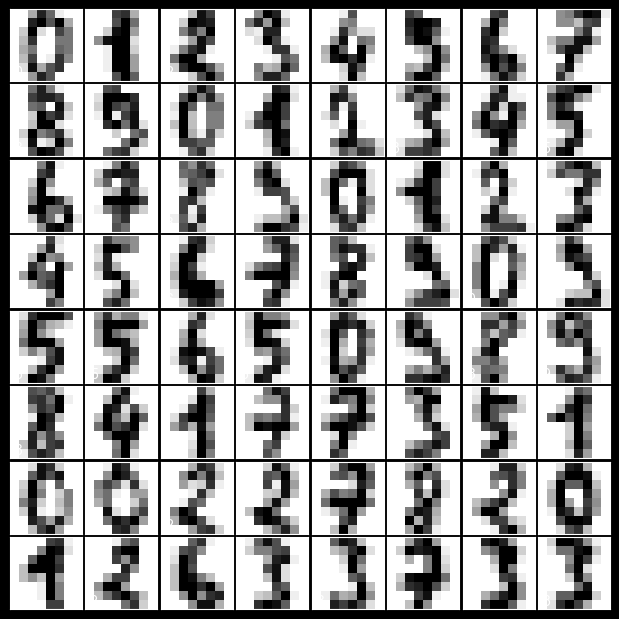

In [37]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

Text(0, 0.5, 'Cumulative explained variance')

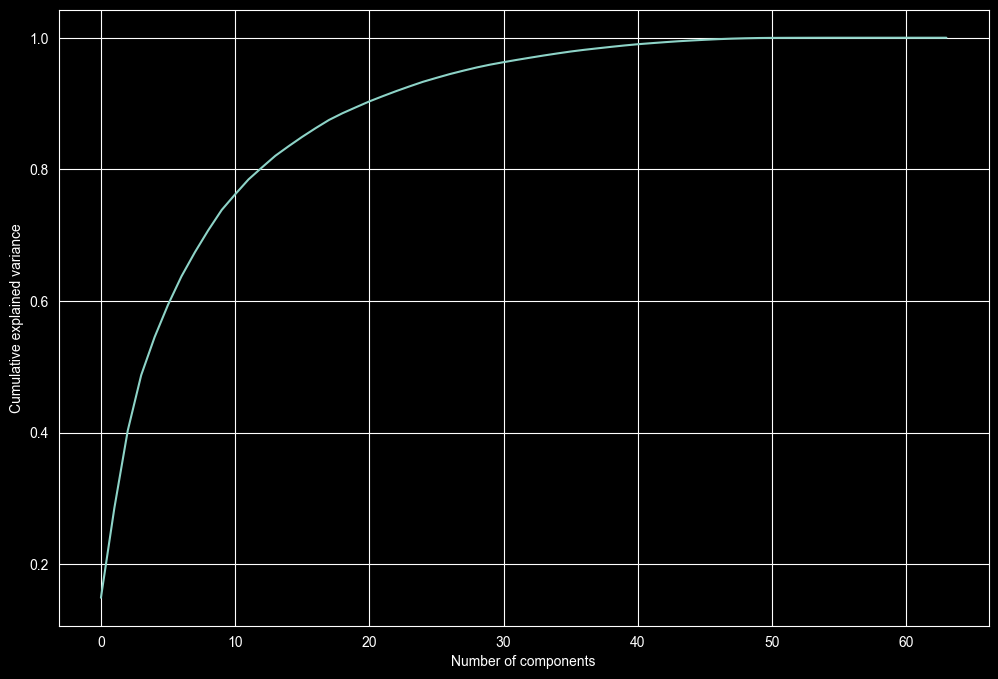

In [38]:
pca = PCA().fit(digits.data)

plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [45]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.8, random_state=42)

model = model = make_pipeline(
    PCA(n_components=48),
    RandomForestClassifier(n_estimators=1000)
)


model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [46]:
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       134
           1       0.91      0.89      0.90       144
           2       0.96      0.94      0.95       144
           3       0.98      0.87      0.92       147
           4       0.99      0.94      0.97       140
           5       0.93      0.97      0.95       149
           6       1.00      0.97      0.98       150
           7       0.90      1.00      0.95       149
           8       0.81      0.89      0.85       135
           9       0.94      0.92      0.93       146

    accuracy                           0.94      1438
   macro avg       0.94      0.94      0.94      1438
weighted avg       0.94      0.94      0.94      1438



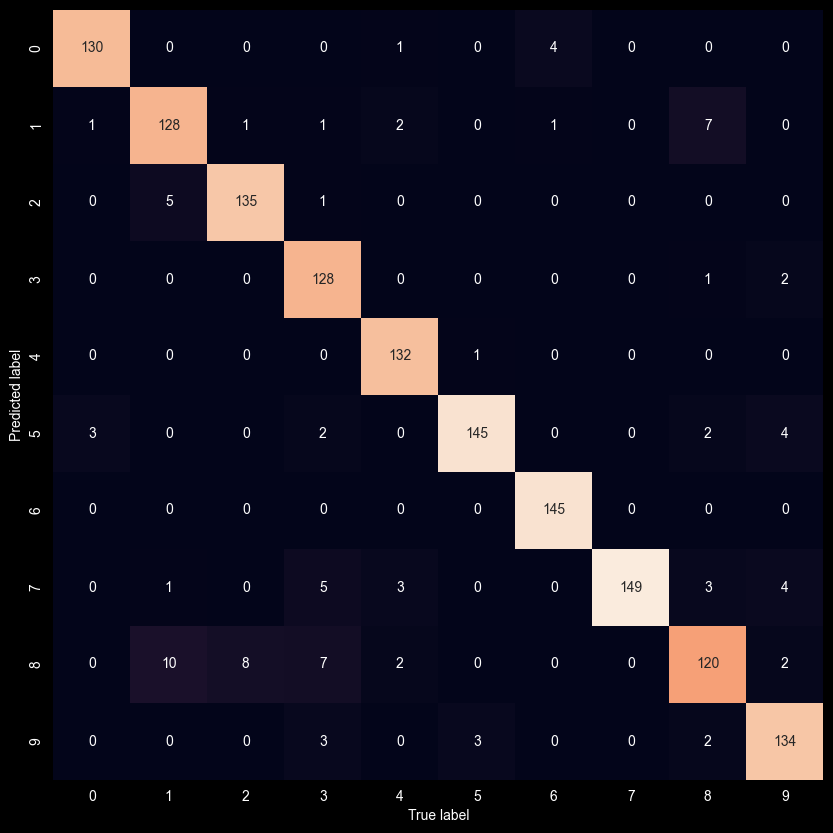

In [47]:
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label');